<a href="https://colab.research.google.com/github/HeadGaur/personal/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression on Titanic dataset



# Importing Libs


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset


In [ ]:
dataset = pd.read_csv("train.csv")
x_train = dataset.iloc[:,2:].values
y_train = dataset.iloc[:,1].values

# features


In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_columns = dataset.select_dtypes(exclude = [object]).columns
df = dataset[df_columns]
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


#Relation btwn features

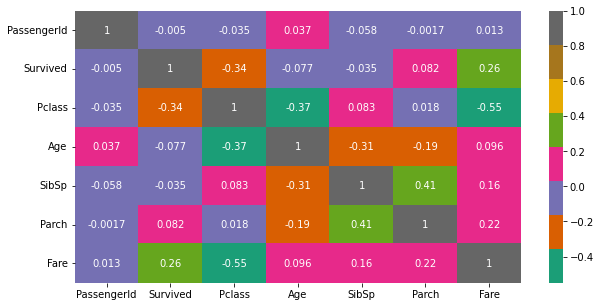

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True,cmap='Dark2')

# correlation of survival with other other features


In [ ]:
correlation = abs(pd.DataFrame(df.corr().Survived))
correlation

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


In [ ]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

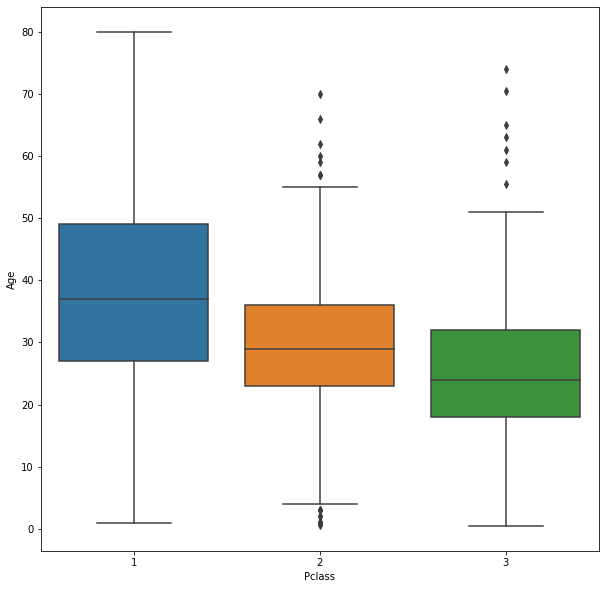

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y='Age' ,x='Pclass', data = dataset)

In [ ]:
def null_ages(args):
  age = args[0]
  Pclass = args[1]

  if pd.isnull(age):
    if Pclass == 1:
      return 37

    if Pclass == 2:
      return 28
    if Pclass == 3:
      return 24
  else:
    return age

In [ ]:
dataset['Age'] = dataset[['Age','Pclass']].apply(null_ages,axis=1)

In [ ]:
dataset['Age'].isnull().sum()

0

In [ ]:
dataset['Cabin'].isnull().sum()

687

In [ ]:
dataset.drop('Cabin',axis=1, inplace=True)

In [ ]:
dataset.drop(['Name','Ticket'],axis=1,inplace=True)

In [ ]:
dataset = pd.get_dummies(dataset,columns=['Sex','Embarked'],drop_first=True)

In [ ]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
dataset.drop('PassengerId',axis=1,inplace=True)

In [ ]:
x = dataset.drop(['Survived'],axis=1)
y = dataset['Survived']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [ ]:
cols = x_train.columns
RS = RobustScaler()
x_train = RS.fit_transform(x_train)
x_test = RS.fit_transform(x_test)

x_train = pd.DataFrame(x_train,columns = cols)
x_test = pd.DataFrame(x_test,columns = cols)
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.105263,0.0,0.0,-0.282835,0.0,0.0,0.0
1,0.0,-0.666667,4.0,2.0,-0.281585,-1.0,0.0,0.0
2,0.0,0.245614,1.0,0.0,0.068522,0.0,0.0,0.0
3,0.0,-0.315789,0.0,0.0,-0.310493,0.0,0.0,0.0
4,-1.0,1.298246,0.0,0.0,-0.042827,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
663,-2.0,0.877193,1.0,1.0,2.940398,-1.0,0.0,-1.0
664,0.0,-0.526316,1.0,0.0,-0.284617,-1.0,0.0,0.0
665,0.0,-0.175439,0.0,0.0,-0.289794,0.0,1.0,-1.0
666,0.0,0.666667,1.0,0.0,0.124197,-1.0,0.0,0.0


In [ ]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = LR.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[118,  21],
       [ 24,  60]])

In [ ]:
dataset_test = pd.read_csv("test.csv")
x_test = dataset_test.iloc[:,:].values



In [ ]:

dataset_test['Age']= dataset_test[['Age','Pclass']].apply(null_ages,axis=1)


In [ ]:
dataset_test.drop('Cabin',axis=1,inplace=True)

In [ ]:
null_columns = dataset_test.columns[dataset_test.isnull().any()]
null_columns

Index(['Fare'], dtype='object')

In [ ]:
nan_value = dataset_test['Fare'].median()
dataset_test = dataset_test.replace(np.NaN,nan_value)


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
final_df = dataset_test['PassengerId']


0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [ ]:
dataset_test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
dataset_test = pd.get_dummies(dataset_test,columns=['Sex','Embarked'],drop_first=True)


In [ ]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.105263,0.0,0.0,-0.282835,0.0,0.0,0.0
1,0.0,-0.666667,4.0,2.0,-0.281585,-1.0,0.0,0.0
2,0.0,0.245614,1.0,0.0,0.068522,0.0,0.0,0.0
3,0.0,-0.315789,0.0,0.0,-0.310493,0.0,0.0,0.0
4,-1.0,1.298246,0.0,0.0,-0.042827,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
663,-2.0,0.877193,1.0,1.0,2.940398,-1.0,0.0,-1.0
664,0.0,-0.526316,1.0,0.0,-0.284617,-1.0,0.0,0.0
665,0.0,-0.175439,0.0,0.0,-0.289794,0.0,1.0,-1.0
666,0.0,0.666667,1.0,0.0,0.124197,-1.0,0.0,0.0


In [ ]:
cols = dataset_test.columns

dataset_test = RS.fit_transform(dataset_test)
dataset_test = pd.DataFrame(dataset_test,columns = cols)


In [ ]:
y_fpred = LR.predict(dataset_test)
y_fpred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission = pd.DataFrame({'PassengerId':final_df,'Survived':y_fpred})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('submission.csv',index=False)